In [1]:
import graph_tool.all as gt
import graph_tool.stats as gts

def pajTOgt(filepath, directed = False, removeloops = True):
  if directed:
    g = gt.Graph(directed=True)
  else:
    g = gt.Graph(directed=False)

  #define edge and vertex properties
  g.edge_properties["weight"] = g.new_edge_property("double")
  g.vertex_properties["id"] = g.new_vertex_property("string")

  with open(filepath, encoding = "utf-8") as input_data:
    #create vertices
    for line in input_data:
        g.add_vertex(int(line.replace("*Vertices ", "").strip())) #add vertices
        break

    #label vertices
    for line in input_data: #keeps going for node labels
      if not line.strip() == '*Edges' or line.strip() == '*Arcs':  
        v_id = int(line.split()[0]) - 1
        g.vertex_properties["id"][g.vertex(v_id)] = "".join(line.split()[1:])
      else:
        break

    #create weighted edges
    for line in input_data: #keeps going for edges
      linesplit = line.split()
      linesplit = [int(x) for x in linesplit[:2]] + [float(linesplit[2])]
      if linesplit[2] > 0:
        n1 = g.vertex(linesplit[0]-1)
        n2 = g.vertex(linesplit[1]-1)
        e = g.add_edge(n1, n2)
        g.edge_properties["weight"][e] = linesplit[2]

    if removeloops:
      gts.remove_self_loops(g)

    return g

ModuleNotFoundError: No module named 'graph_tool'

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
# import scipy

In [32]:
# graph = nx.read_pajek("/home/aldebaran/ex_ntfs/study/PUC/GRAFOS/pesquisa-redes-complexas/bases-dados/movie_actors/movie_actors.net", encoding='UTF-8')
# graph = nx.read_pajek("/home/aldebaran/ex_ntfs/study/PUC/GRAFOS/pesquisa-redes-complexas/bases-dados/US_airports/US_airports.net")
# graph4 = nx.read_pajek("/home/aldebaran/Documents/cache/grafos-pesquisa/bases-dados/kindergarten/kindergarten.net")
# graph3 = nx.read_pajek("/home/aldebaran/Documents/cache/grafos-pesquisa/bases-dados/www/web-Google.net")
graph = nx.read_pajek("/home/aldebaran/Documents/cache/grafos-pesquisa/bases-dados/SmallW.paj")
graph2 = nx.read_pajek("/home/aldebaran/Documents/cache/grafos-pesquisa/bases-dados/airports.net")
# graph = nx.read_edgelist("/home/aldebaran/ex_ntfs/study/PUC/GRAFOS/pesquisa-redes-complexas/bases-dados/movie_actors/movie_actors.net", encoding='UTF-8')
# graph = nx.read_edgelist("/home/aldebaran/ex_ntfs/study/PUC/GRAFOS/pesquisa-redes-complexas/bases-dados/US_airports/US_airports.net", delimiter=' ')

In [3]:
graph

In [7]:
nx.is_empty(graph)

False

In [8]:
nx.degree(graph)

DiMultiDegreeView({'MILGRAM S': 294, 'ZALAZNICK S': 0, 'TRAVERS J': 126, 'HART JW': 2, 'SOFFER RS': 0, 'KORTE C': 84, 'WHITE HC': 44, 'JACOBSON D': 4, 'LEVINE JH': 14, 'VIANNA NJ': 14, 'HUNTER JE': 40, 'GRIFFITH BC': 2, 'MULLINS NC': 4, 'GRANOVETTER MS': 104, 'CRAVEN P': 14, 'KAPLAN J': 0, 'KILLWORTH PD': 76, 'SEEMAN M': 10, 'BOCHNER S': 40, 'BOORMAN SA': 40, 'ERICKSON BH': 18, 'LUNDBERG CC': 24, 'FIENBERG SE': 8, 'KAHLER HD': 6, 'SHULMAN N': 4, 'GUIOT JM': 14, 'BURT RS': 48, 'DORKEN H': 4, 'STONEHAM AKM': 10, 'ANDREWS HF': 12, 'FEIDELMAN L': 0, 'CARTWRIGHT D': 4, 'GUPTA UD': 0, 'HORWITZ A': 10, 'BURSTEIN P': 6, 'CLARK FE': 0, 'SOLOMON RC': 0, 'STEIN P': 0, 'BENNIS W': 0, 'SMITH CJ': 8, 'ARABIE P': 16, 'DESOLAPOOL I': 18, 'LIN N': 20, 'GREENWALD P': 10, 'FINE GA': 10, 'COOK BP': 0, 'GARFIELD E': 34, '[Anon] .': 10, 'BECQUARTLECLERCQ J': 4, 'BERNARD HR': 64, 'DENMARK FL': 6, 'LAFAYE C': 0, 'SMITH TR': 4, 'ALLERHAND J': 0, 'RUSH R': 0, 'NIEMOLLER K': 18, 'HAMMER M': 10, 'FELD SL': 18, 'D

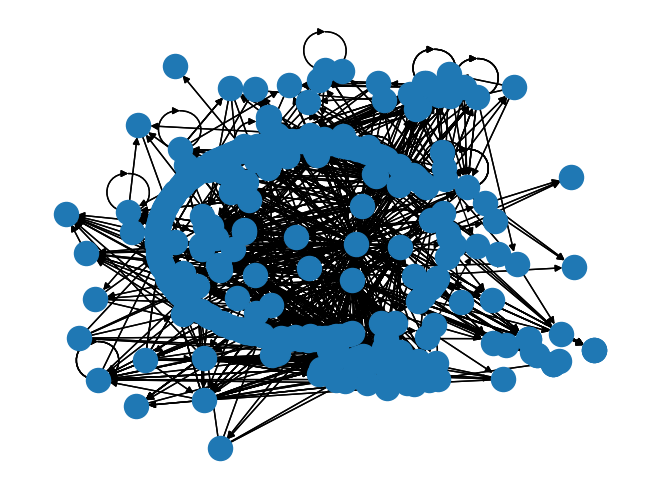

In [9]:
# nx.draw_spring(graph)
# nx.draw_networkx(graph)
# nx.draw_networkx_edges(graph, pos=nx.spring_layout(graph))
# nx.draw_planar(graph)
nx.draw_kamada_kawai(graph)
# plt.draw()

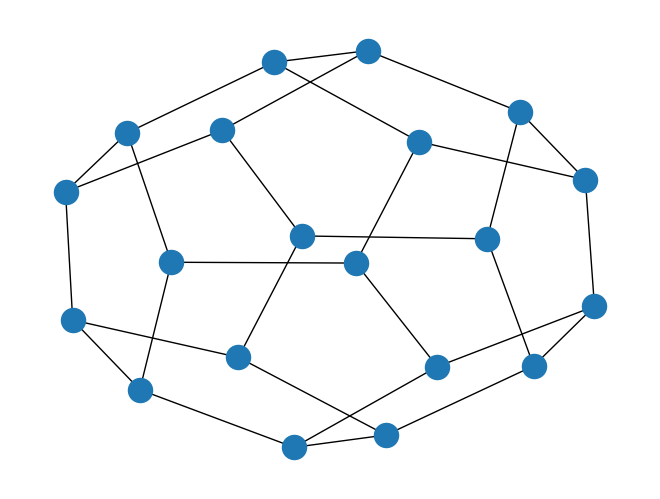

In [10]:
G = nx.dodecahedral_graph()
nx.draw(G)
# nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

In [11]:
G = nx.path_graph(4)

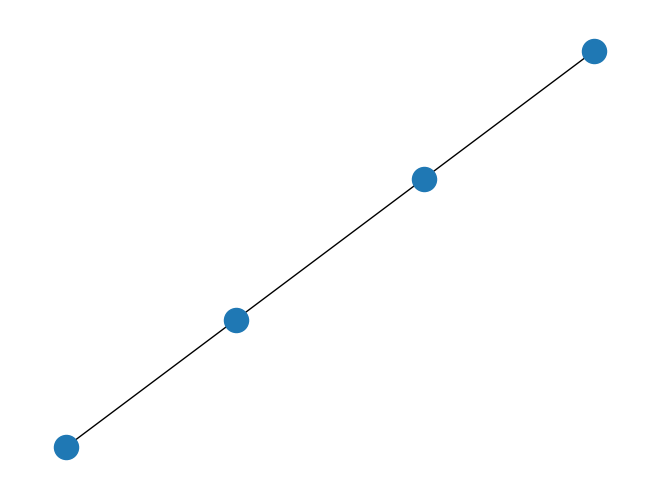

In [12]:
nx.draw(G)

In [13]:
nx.write_pajek(G, "test.net")

# Tips to draw large graphs
- Set figure size using `plt.figure(figsize=(12, 10)` from *matplotlib.pyplot*

- Set `pos = nx.draw_kamada_kawai(graph)`

- Set how nodes should appear with dictionary. I can be called `node_options`. This will be passed to the *networkx* function `nx.draw_networkx_nodes`

- Set how your edges should appear with `edge_options`. It will be passed to `nx.draw_networkx_edges`

- Call the `plt.show()` function from *matplotlib.pyplot*

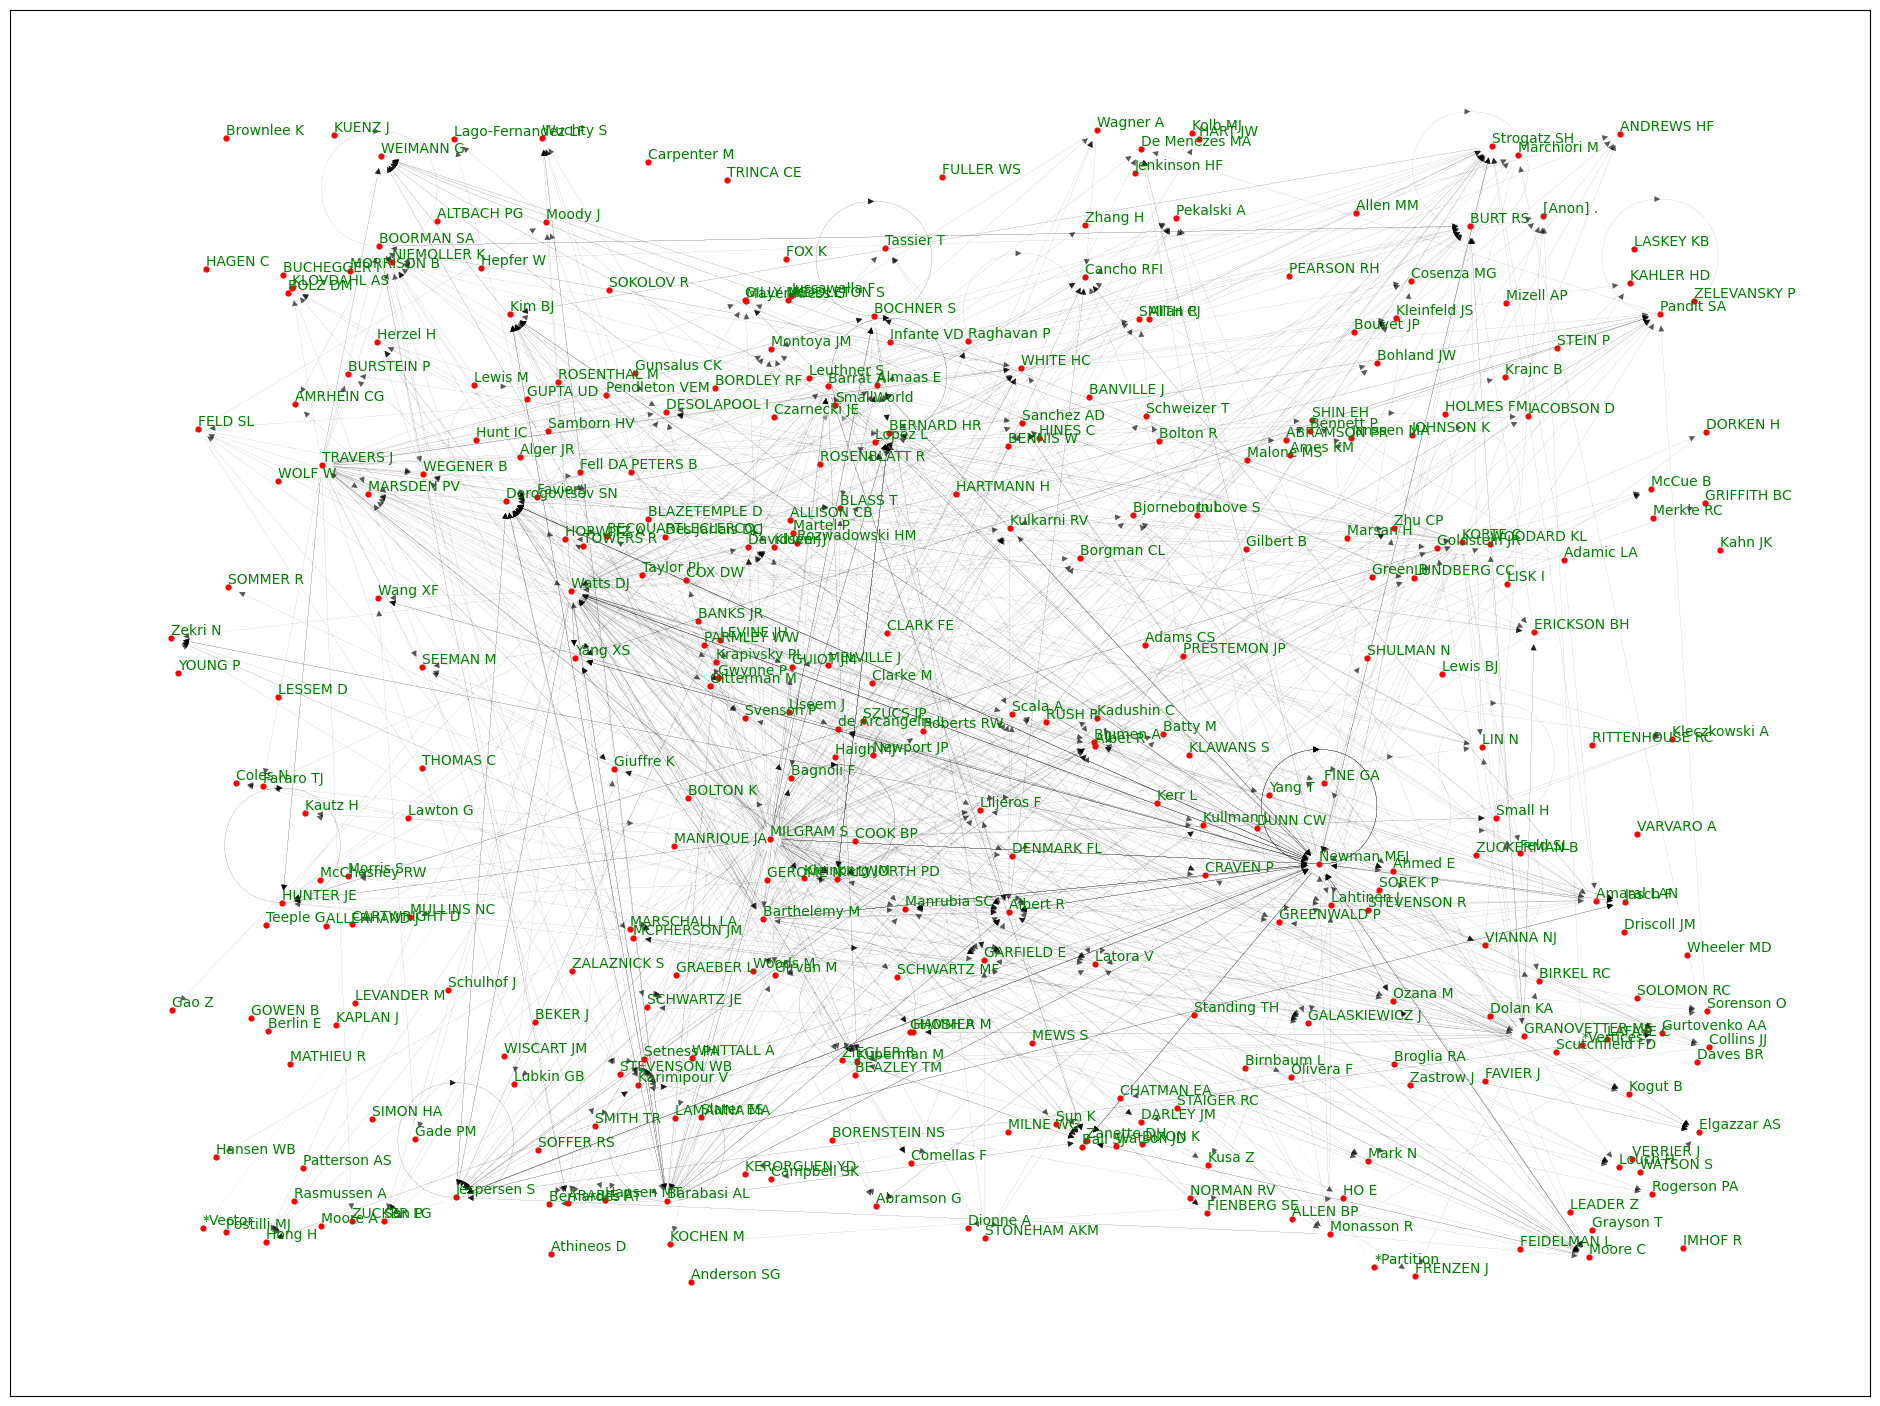

In [51]:
# Figure size
plt.figure(figsize=(24, 18))

# Pos
# pos = nx.kamada_kawai_layout(graph)
# pos = nx.spring_layout(graph)
pos = nx.random_layout(graph) # I like this one
# pos = nx.circular_layout(graph)
# pos = nx.bipartite_layout(graph, 1) # Does not work yet
# pos = nx.shell_layout(graph)
# pos = nx.spectral_layout(graph)
# pos = nx.spiral_layout(graph)
# pos = nx.multipartite_layout(graph)

# Node options
node_options = {"node_color": "red", "node_size": 12}

# Edge options
edge_options = {"width": .06, "alpha": .4, "edge_color": "black"}

# Node label options
node_label_options = { "font_size": 10,
                       "font_color": "green",
                       "verticalalignment": "bottom",
                       "horizontalalignment": "left"}

# Edge label options
# edge_label_options = { "font_size": 5,
#                        "font_color": "green",
#                        "verticalalignment": "bottom",
#                        "horizontalalignment": "left"}

# Draw nodes
nx.draw_networkx_nodes(graph, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(graph, pos, **edge_options)

# Draw node labels
nx.draw_networkx_labels(graph, pos, **node_label_options)

# Draw edge labels
# nx.draw_networkx_edge_labels(graph, pos, **edge_label_options)

plt.show()

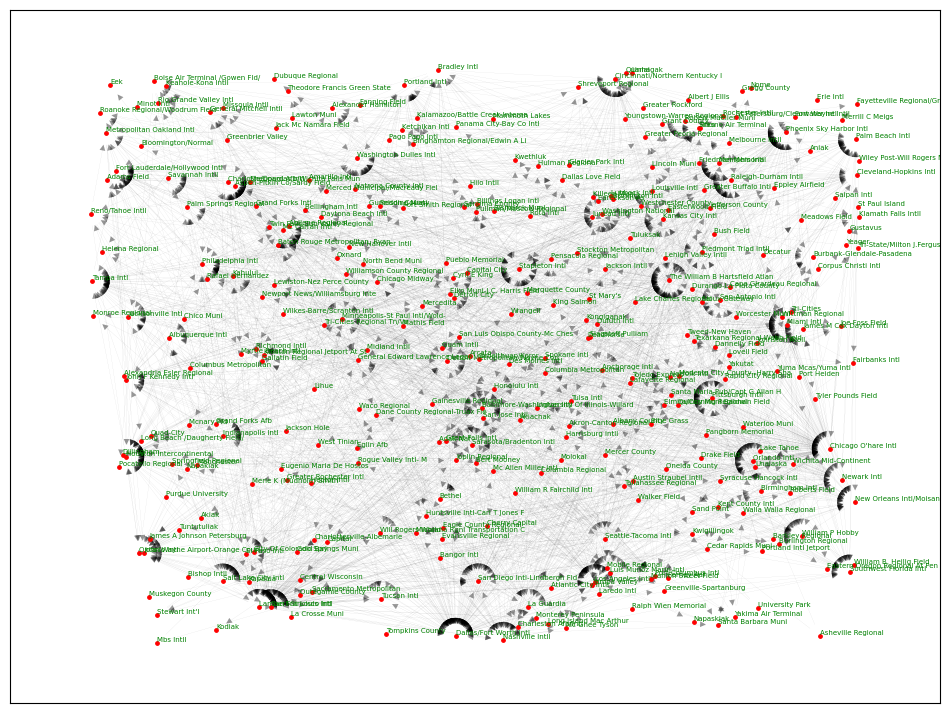

In [48]:
# Figure size
plt.figure(figsize=(12, 9))

# Pos
# pos = nx.kamada_kawai_layout(graph2)
# pos = nx.spring_layout(graph2)
pos = nx.random_layout(graph2) # I like this one
# pos = nx.circular_layout(graph)
# pos = nx.bipartite_layout(graph, 1) # Does not work yet
# pos = nx.shell_layout(graph)
# pos = nx.spectral_layout(graph)
# pos = nx.spiral_layout(graph)
# pos = nx.multipartite_layout(graph)

# Node options
node_options = {"node_color": "red", "node_size": 6}

# Edge options
edge_options = {"width": .05, "alpha": .4, "edge_color": "black"}

# Node label options
node_label_options = { "font_size": 5,
                       "font_color": "green",
                       "verticalalignment": "bottom",
                       "horizontalalignment": "left"}

# Edge label options
# edge_label_options = { "font_size": 5,
#                        "font_color": "green",
#                        "verticalalignment": "bottom",
#                        "horizontalalignment": "left"}

# Draw nodes
nx.draw_networkx_nodes(graph2, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(graph2, pos, **edge_options)

# Draw node labels
nx.draw_networkx_labels(graph2, pos, **node_label_options)

# Draw edge labels
# nx.draw_networkx_edge_labels(graph2, pos, **edge_label_options)

plt.show()